## Harris Corner Detector in OpenCV
OpenCV has the function ```cv.cornerHarris()``` for this purpose. Its arguments are:

- **img** - Input image. It should be grayscale and float32 type. 
- **blockSize** - It is the size of neighbourhood considered for corner detection.
- **ksize** - Aperture parameter of the Sobel derivative used.
- **k** - Harris detector free parameter in the equation.

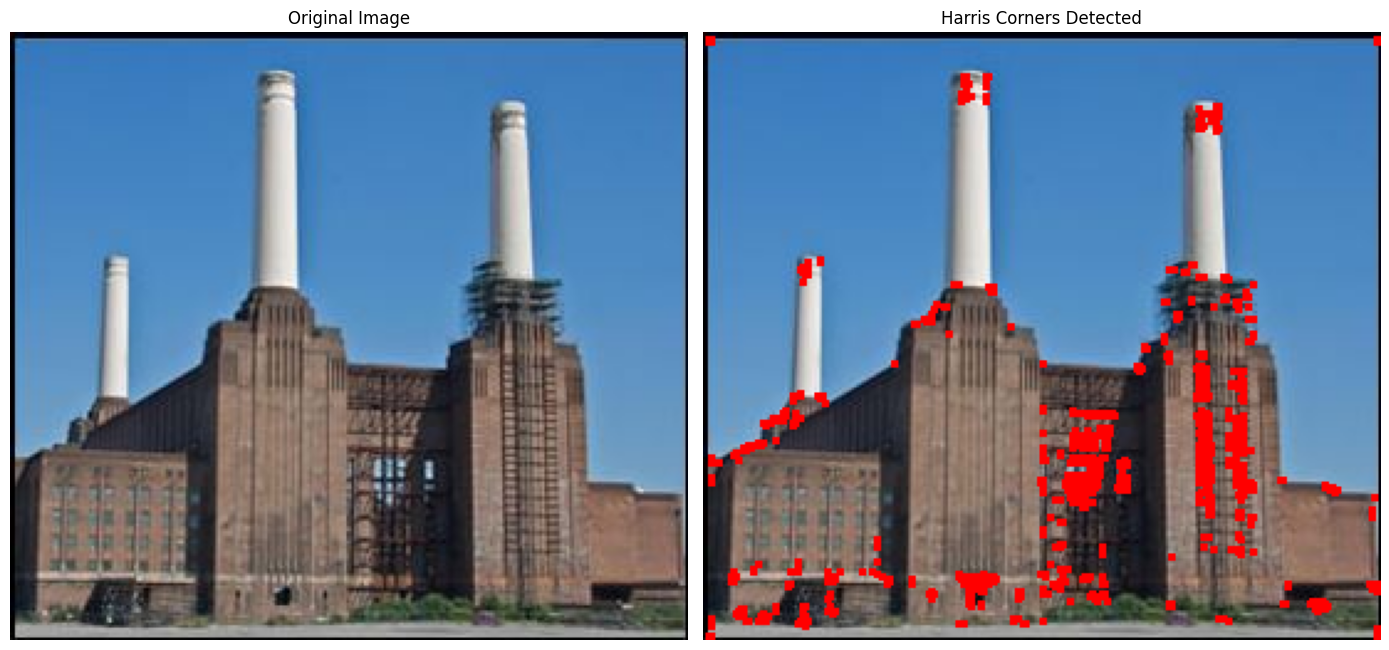

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

filename = '../docs/images/image1.JPG'
img = cv.imread(filename)

original_img = img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

# Result is dilated for marking the corners
dst = cv.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]
# Convert BGR to RGB for matplotlib display
original_rgb = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
output_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# Input
axes[0].imshow(original_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
# Output
axes[1].imshow(output_rgb)
axes[1].set_title('Harris Corners Detected')
axes[1].axis('off')
plt.tight_layout()
plt.show()

In [16]:
import numpy as np
import cv2 as cv

filename = '../docs/images/image5.JPG'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None)
ret, dst = cv.threshold(dst, 0.01*dst.max(), 255, 0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)
# Now draw them
res = np.hstack((centroids, corners))
res = np.intp(res)
img[res[:,1], res[:,0]] = [0, 0, 255]
img[res[:,3], res[:,2]] = [0, 255, 0]
cv.imwrite('subpixel5.png', img)

True